In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [31]:
# Q1 - What is the Fisher Exact Test, what does it do, and why is it used?


Fisher Test = a stats test for association between two categorical variables. It calculates the exact probability, improving suitability for small sample sizes. Helps test hypotheses. (Alternative to the likes of Chi-square)

Used in machine learning: yes, used to identify significant features, compare the predictions of different models to test performance, and identify flaws in a regression model by investigating associations between categories and errors. 

Limitations: impractical for large datasets, may not always capture complex interactions due to its focus on paired relationships.

In [32]:
# 2. Understand the null hypothesis and p-values

P-value = a statistical measure that assesses the evidence against the null hypothesis, i.e. the likelihood of obtaining the observed results in your data *if* the null hypothesis were the correct one. The lower the P-value, the more likely that your alternative hypothesis is the correct one, therefore a low P-value is evidence *against* a null hypothesis and *for* the alternative. 

P-values are compared against a significance level which is a threshold at which your P-value may be considered statistically significant or not. The norm is 0.05 so a P-value higher than this would support the null-hypothesis while a lower one supports the alternative hypothesis. 

This gives you a way to determine if your observed data are statistically significant, or if it has occurred by random chance. But a p-value does not provide the probability that either hypothesis is true: it only assesses the evidence against the null hypothesis based on the observed data.

Null hypothesis: the default assumption that there is no effect or relationship between the two variables you are testing.
Alternative hypothesis: the alternative assumption that there is an effect or relationship present between our variables. 

Notes for Q3 and how to start it.

- Create our own dataset where we know what the parameters M and B are, so we can test out the regression we're making, like using np.arange() or np.linspace() to create an array of X-values. np.random() also works.
- Use y=mx+c for those variables using np.random()
- Plot X and Y on a scattergraph or line graph.
- Write a Pythonic function into the code that calculates MSE as the loss function.
- Implement gradiant descent to reduce MSE. Optimise for m and b.
- Identify optimal m & b and have an output of total loss. Return should be m, b, and loss.
Loss = MSE summed over different values of m & b. 

- Plot two separate regression lines to show your data before and after gradiant descent to see the difference it makes. Use matplotlib to build these. 

Remember that if you can't code Scikit to calculate something for you, one possible work-around is to do it yourself using NumPy if you know the equation and can input all the necessary values.

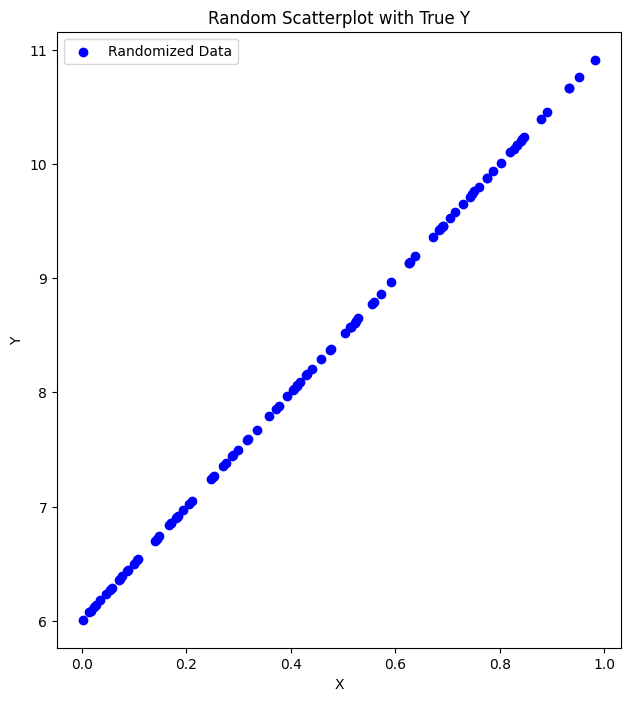

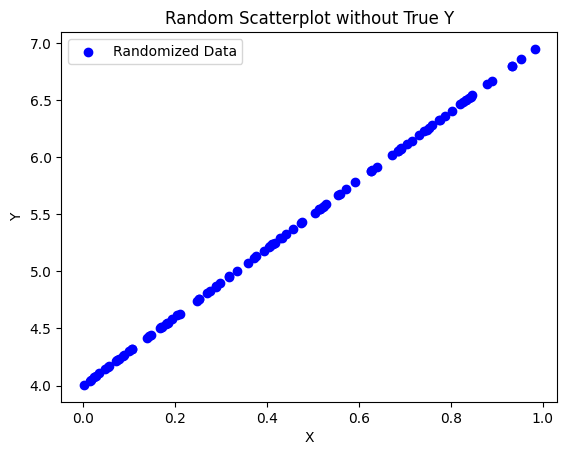

In [33]:
# Create random dataset and check on a scatter.

x = np.random.rand(100,1)
m1 = 5
b1 = 6
# m1 and b1 are the true m & b
y_true = m1*x+b1

m2 = 3
b2 = 4
y_pred = 3*x + 4
# This was made-up differently to the True Y for test purposes to pretend I've made an entire model.

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(121)
plt.scatter(x, y_true, label='Randomized Data', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Scatterplot with True Y')
plt.legend()
plt.show()

ax = fig.add_subplot(122)
plt.scatter(x, y_pred, label='Randomized Data', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Scatterplot without True Y')
plt.legend()
plt.show()

In [34]:
y_pred = 3*x + 4
# This was made-up differently to the True Y for test purposes to pretend I've made an entire model that turns out to be rubbish.

print(y_true[:5])

print(y_pred[:5])
# First five predicted values for eyeballed comparison.

[[7.25798045]
 [9.71140954]
 [9.79938469]
 [6.23694356]
 [6.83409441]]
[[4.75478827]
 [6.22684572]
 [6.27963081]
 [4.14216614]
 [4.50045665]]


In [35]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_true, y_pred)

print(MSE)

8.693482744436041


In [36]:
# In this context, an MSE of 8.69 seems fairly high so my deliberately incorrect model is indeed a poor performer as I intended. Now let's fix it with gradient descent. 

Iteration 0: Mean Squared Error (MSE) = 2.8058954232992774
Iteration 10: Mean Squared Error (MSE) = 1.1195233220037737
Iteration 20: Mean Squared Error (MSE) = 0.9626987635294427
Iteration 30: Mean Squared Error (MSE) = 0.8815727755791777
Iteration 40: Mean Squared Error (MSE) = 0.8396059660822812
Iteration 50: Mean Squared Error (MSE) = 0.8178963617514405
Iteration 60: Mean Squared Error (MSE) = 0.8066658935349679
Iteration 70: Mean Squared Error (MSE) = 0.8008563258229474
Iteration 80: Mean Squared Error (MSE) = 0.7978510123889937
Iteration 90: Mean Squared Error (MSE) = 0.7962963513050693
Final Coefficients (theta): [[ 5.43313505]
 [-0.03763281]]


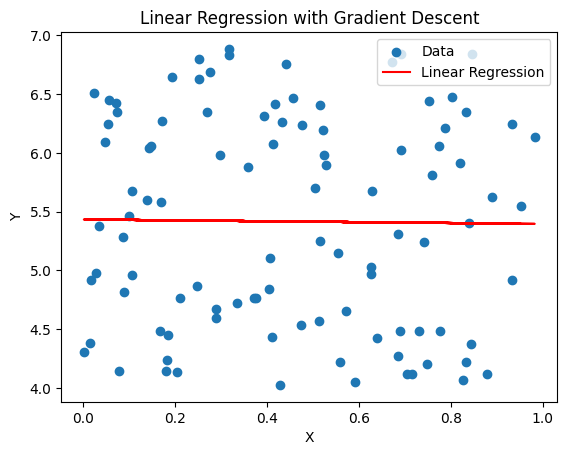

In [49]:
# Add bias term to X
x_b = np.c_[np.ones((100,1)),x]
learning_rate = 0.01
n_iterations = 100
theta = np.random.randn(2,1)

# Function for MSE (ignore the Codium prompt, it's an extension in VS Code that is there at Simon's recommendation but I have not used it.)
 def mse_loss(x_b, y, theta):
    m = len(y)
    predictions = x_b.dot(theta)
    loss = (1/m) * np.sum((predictions - y)**2) # (This is the mean squared error calc)
    return loss

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T @ (x_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    
# Print the MSE at each 10th iteration
    if iteration % 10 == 0:
        loss = mse_loss(x_b, y, theta)
        print(f"Iteration {iteration}: Mean Squared Error (MSE) = {loss}")

# Print the final coefficients (theta)
print("Final Coefficients (theta):", theta)

# Plot the data and the linear regression line
plt.scatter(x, y, label='Data')
plt.plot(x, x_b.dot(theta), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

In [ ]:
# It changes each time I run it, so I assume the way I've done number randomization has buggered it up a bit? 

Batch Gradient Descent: the entire dataset (the 'batch') is used to compute the gradient of the cost function with respect to the model parameters in each iteration. 

Stochastic Gradient Descent: only one randomly selected data point is used at a time, which makes the algorithm faster and is better for larger datasets.

Mini-batch Gradient Descent: a middle ground between batch and stochastic, it takes a small random subset of the dataset for gradient descent. 